*Importing Libraries*

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [11]:
# Import database connetcion
conn = sqlite3.connect('inventory.db')

#Fetching vendor summary data
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,121289.0,4375527.11,597030.97,222854.59,68601.68,564275.51,12.896172,0.836015,1.148055
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,136574.0,4132793.22,499792.66,250941.26,144929.24,328752.00,7.954717,0.832575,1.086422
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,164226.0,3999870.74,410002.42,301751.42,123780.22,581567.06,14.539646,0.876307,1.170133
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,160687.0,3642145.13,373095.38,295250.01,257032.07,380947.19,10.459418,0.796734,1.116812
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,115090.0,3600875.10,481869.59,211465.11,257032.07,577669.09,16.042464,0.833327,1.191078


#Exploratory Data Analysis  

* Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which one should be included in the  final anaysis

* in this phase of EDA, we analyze the resulatant table to gain insights into the distribution of each columns. this will help us understanding data patterns, identify anomalies, and ensure data quality before proceeding with further analysis

In [14]:
#Sumarry statistsics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,2.599079e+03,9365.809668,0.00,25.000000,208.000000,1582.250000,2.927920e+05
TotalSalesDollars,10692.0,3.549877e+04,142163.247317,0.00,551.965000,4309.985000,23851.667500,4.375527e+06
TotalSalesPrice,10692.0,1.597096e+04,38867.711116,0.00,205.907500,2262.705000,13393.567500,5.970310e+05


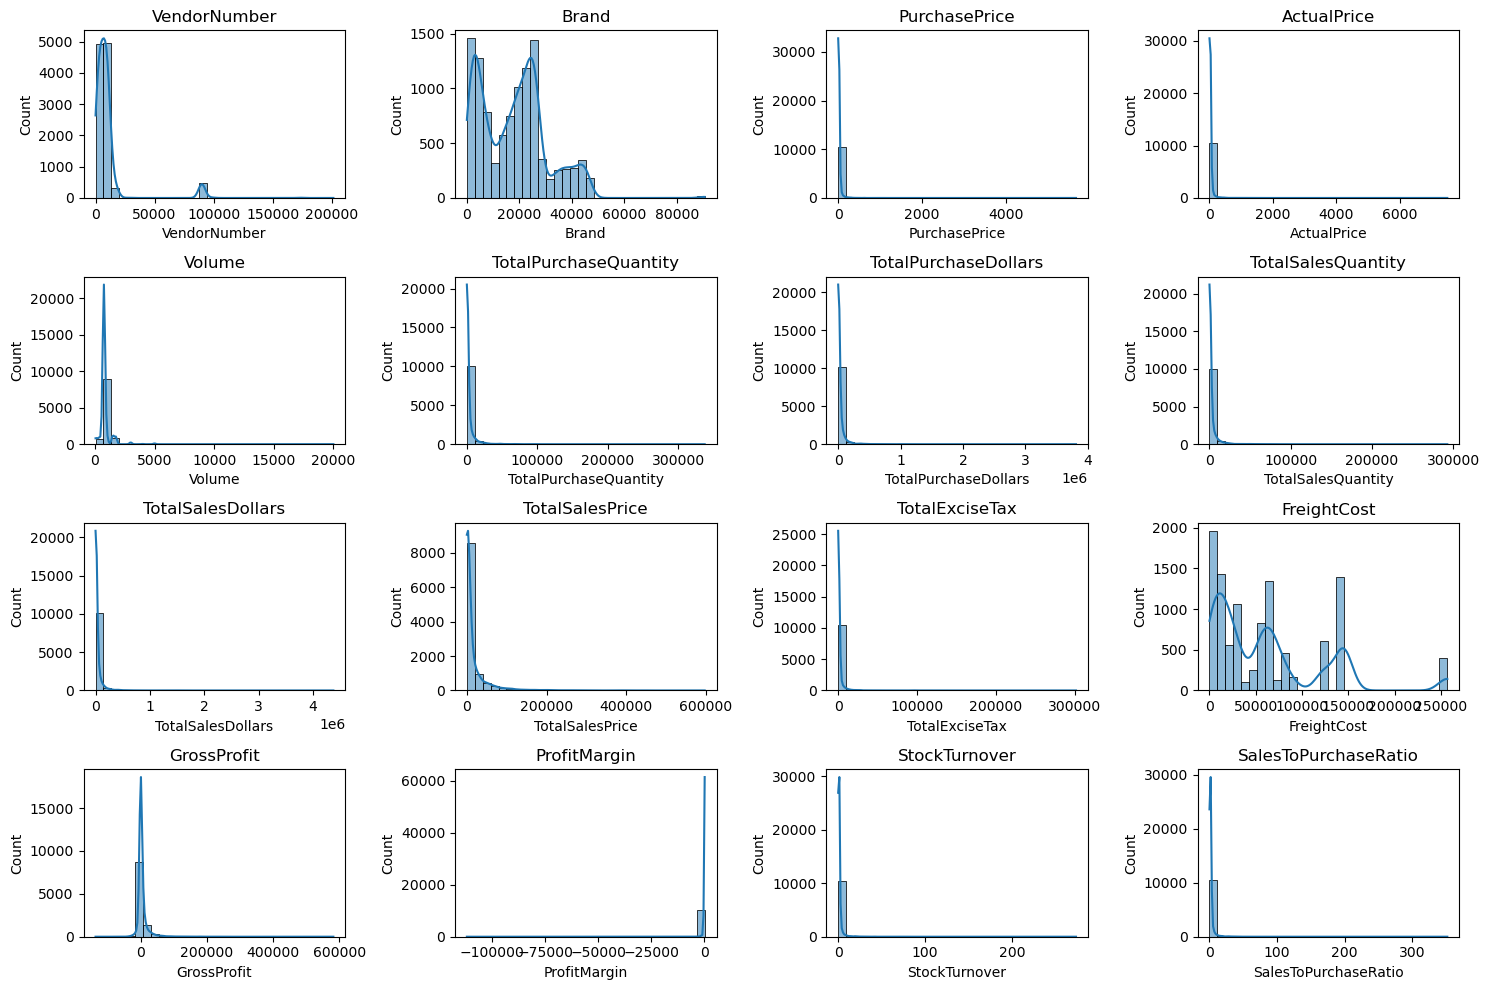

In [16]:
#Distribution plots for numeric columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1) #Adjustgrid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

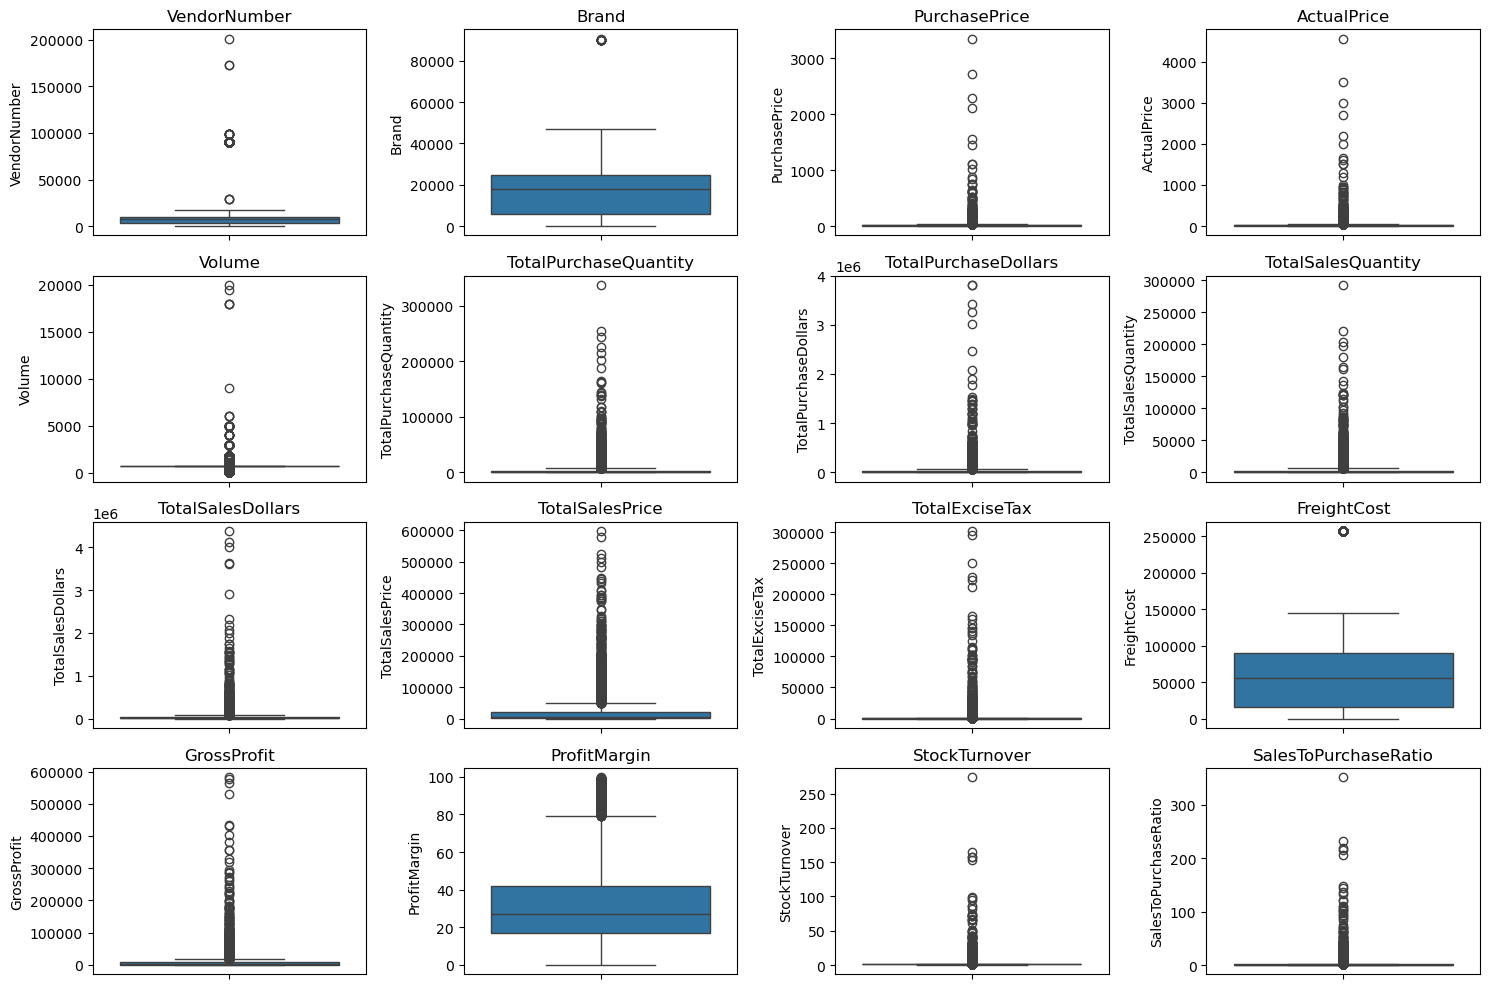

In [36]:
#Outlier detection with Boxplots

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1) #Adjustgrid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Summary statitics Insights

*Negative and Zero Values*

* Gross profit: Minimum value is -52,002.78, inccluding losses. Some products or transcations may be selling at loss due to high costs or selling at discounts lower than the purchase price 
* Profit Margin: Has a minimum purchase of -infinity , which suggests cases where revenue is zero or even lower than costs.
* Total sales quantity & Sales Dollars: Minimum value are 0 , meaning some products were purchased but never sold. These could be slow-moving or obsolute stock


*Outliers indicated by high standard derivations*

* Purchase & Actual Prices : The max values (5,681.810 & 7,499.99) are significantally higher than the mean (24.39 & 35.64), indicating potentially premium products.
* Freight Cost Huge Variations, from 0.09 to 257,032.07) suggests logistics inefficiencies or bulk shipments.
* Stock Turnover : Rnages from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinetely . Value ore than 1 indicates that sold quantity for tat produt is higher than purchased quantity due to either salesare being fulfilled from older stock.

In [18]:
#Lets filter the data by removing inconsistencies
df= pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""", conn)


In [48]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,121289.0,4375527.11,597030.97,222854.59,68601.68,564275.51,12.896172,0.836015,1.148055
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,136574.0,4132793.22,499792.66,250941.26,144929.24,328752.00,7.954717,0.832575,1.086422
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,164226.0,3999870.74,410002.42,301751.42,123780.22,581567.06,14.539646,0.876307,1.170133
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,160687.0,3642145.13,373095.38,295250.01,257032.07,380947.19,10.459418,0.796734,1.116812
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,115090.0,3600875.10,481869.59,211465.11,257032.07,577669.09,16.042464,0.833327,1.191078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2,2.84,14.0,27.86,5.97,0.73,257032.07,25.02,89.806174,7.000000,9.809859
7490,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
7491,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
7492,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,62.0,123.38,63.68,13.02,257032.07,121.91,98.808559,62.000000,83.931973


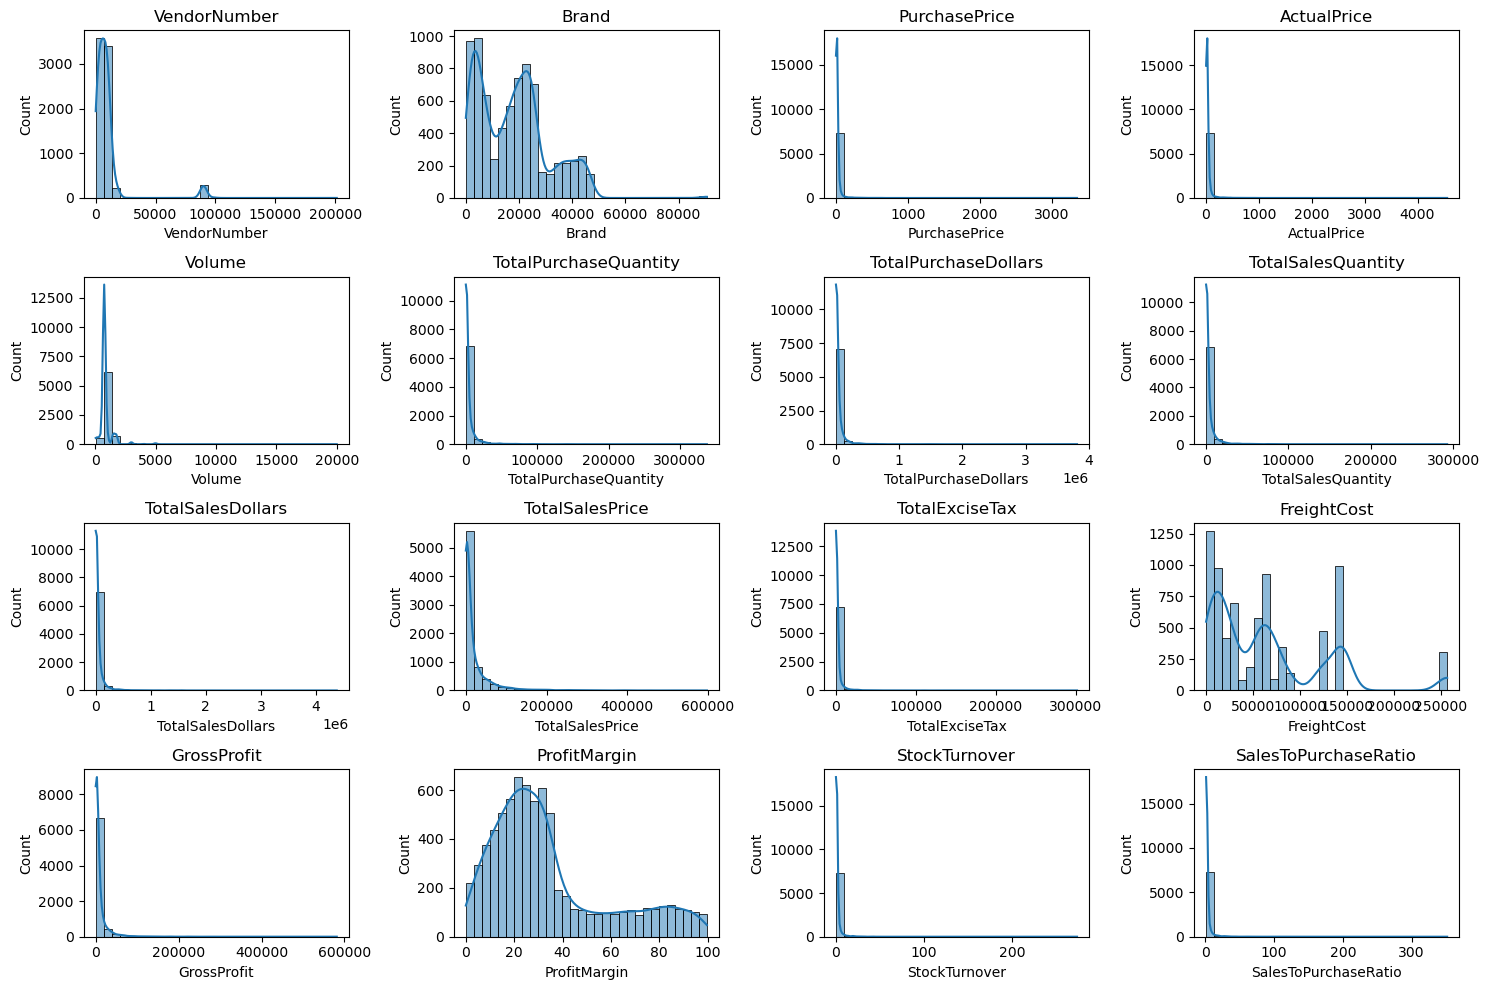

In [20]:
#Distribution plots for numeric columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1) #Adjustgrid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

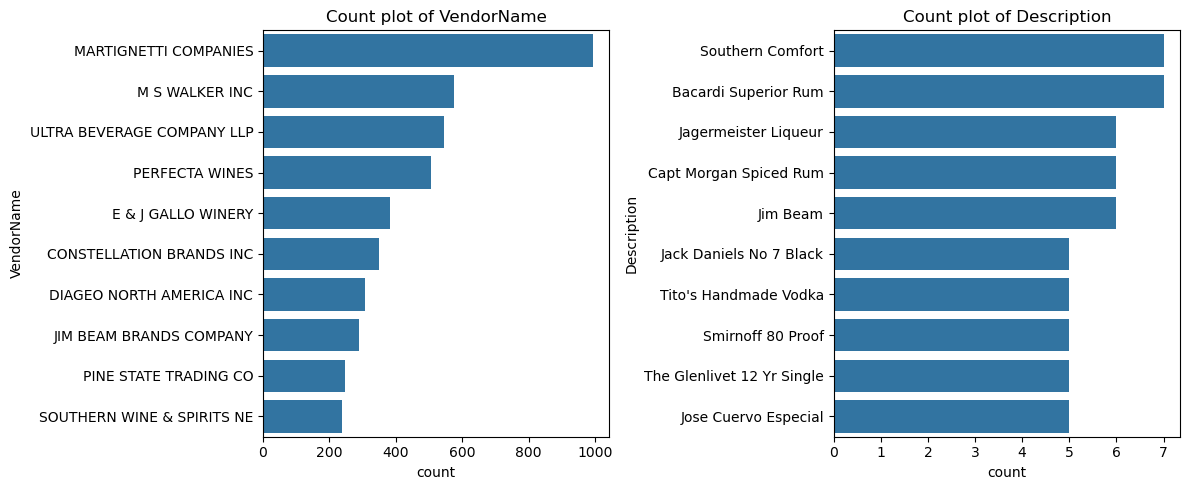

In [65]:
#Count Plot for categorical columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize= (12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) #Top 10 categories
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

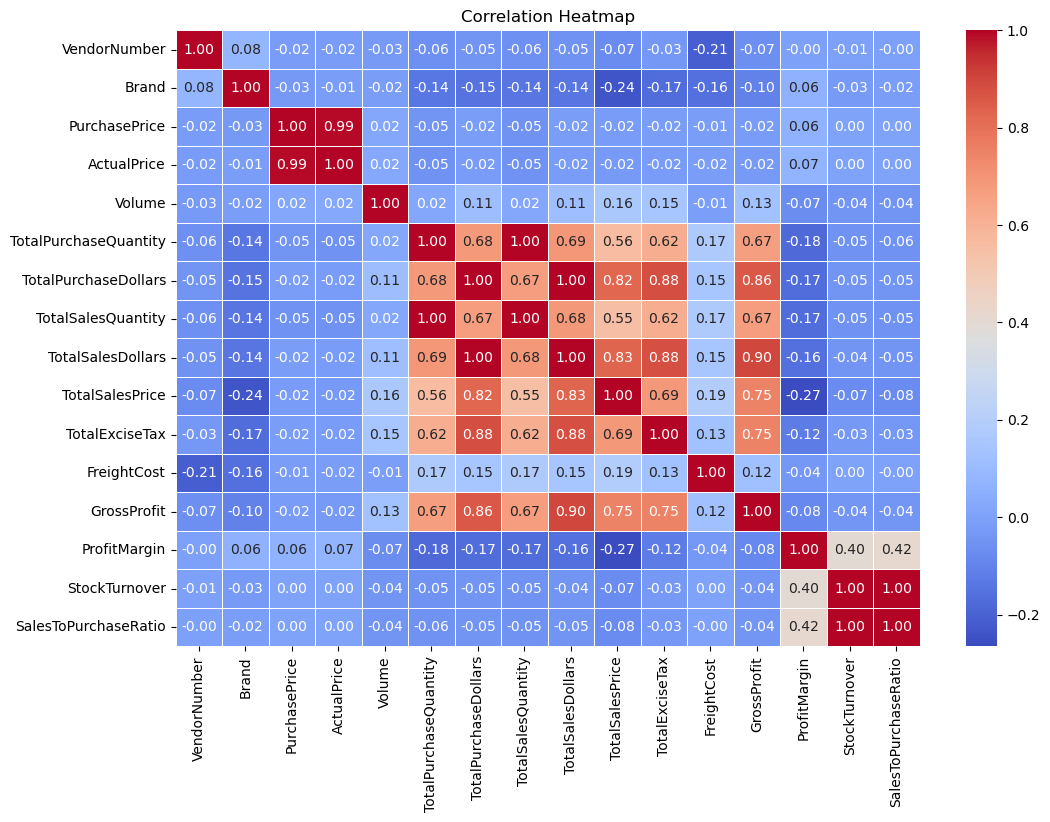

In [21]:
#Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, fmt=".2f", cmap="coolwarm", linewidths= 0.5)
plt.title("Correlation Heatmap")
plt.show()

# Correlation Insights

* PurchasePrice has weak correlations with TotalSalesDollars(-0.012) and GrowthProfit(-0.016), suggesting that the price variations do not significantly impact sales revenue or profit
* Strong Correaltion between total purchase quantity and toatal sales quantity(0.999) , confirming efficient inventory turnover.
* Negative correltion between profit margin & total sales price (-0.179) suggests that as sales price increases , amrgins decreases , possibly due to competitive pricing pressures.
* StoackTurnover has weak negative correlation with both grossProfit(-0.038) and ProfitMargin (-0.0555) , indicating that faster turnover does not necessarily results in higher profitablity

# Data Analysis

1. Identify Brands that needs Promotiotional or pricing Adjustments which exhibit lower sales performancebut higher profit margins

In [24]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars' : 'sum',
    'ProfitMargin':'mean'}).reset_index()

In [26]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [90]:
low_sales_threshold


574.6965

In [28]:
high_margin_threshold 

67.23175433412969

In [40]:
target_brands = brand_performance[
   (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
   (brand_performance['ProfitMargin'] >= high_margin_threshold) 
]
print("Brand with low sales but high profit margin")
display(target_brands.sort_values('TotalSalesDollars'))

Brand with low sales but high profit margin


,Description,TotalSalesDollars,ProfitMargin
1877,Concannon Glen Ellen Wh Zin,15.95,83.448276
1980,Crown Royal Apple,27.86,89.806174
5491,Sauza Sprklg Wild Berry Marg,27.96,82.153076
4268,Merry Irish Cream Liqueur,35.97,73.533500
6327,Tracia Syrah,44.94,88.495772
...,...,...,...
1455,Ch Lacoste-Borie Pauillac 10,558.87,69.230769
3103,Harthill Farms Cab Svgn,560.92,89.346074
2451,Ermita Sn Felices Rose Rioja,570.64,89.832469
1954,Couvent des Thorins Moulin,571.78,96.949876


In [38]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] <10000]  #For better visualization


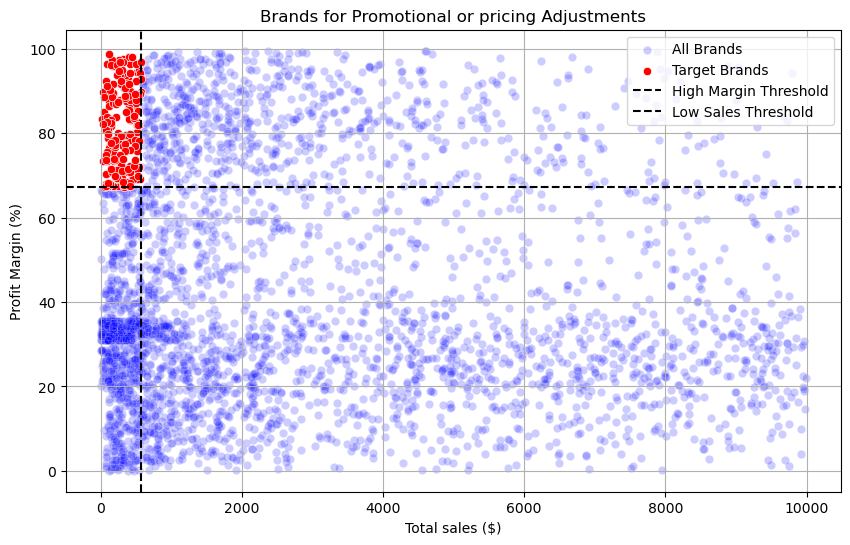

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data= target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

2. Which vendors and brands demostrates the highest sales performance

In [44]:
def format_dollars(value):
    if value >= 1_00_000:
        return f"{value / 1_00_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}k"
    else:
        return str(value)

In [46]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors                                                                           

VendorName
DIAGEO NORTH AMERICA INC      51051840.75
MARTIGNETTI COMPANIES         32435357.84
JIM BEAM BRANDS COMPANY       23990487.76
PERNOD RICARD USA             23037985.11
BACARDI USA INC               20768519.24
CONSTELLATION BRANDS INC      20347165.54
E & J GALLO WINERY            15214684.82
BROWN-FORMAN CORP             14459671.61
ULTRA BEVERAGE COMPANY LLP    13216798.02
M S WALKER INC                12062089.89
Name: TotalSalesDollars, dtype: float64

In [113]:
top_brands

Description
Jack Daniels No 7 Black    6441182.07
Tito's Handmade Vodka      6284661.05
Grey Goose Vodka           6164359.61
Absolut 80 Proof           5447269.32
Capt Morgan Spiced Rum     5167953.21
Ketel One Vodka            4311655.03
Tanqueray                  3025781.91
Baileys Irish Cream        2990384.38
Jim Beam                   2877026.84
Kahlua                     2849805.85
Name: TotalSalesDollars, dtype: float64

In [117]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    64.41M
Tito's Handmade Vodka      62.85M
Grey Goose Vodka           61.64M
Absolut 80 Proof           54.47M
Capt Morgan Spiced Rum     51.68M
Ketel One Vodka            43.12M
Tanqueray                  30.26M
Baileys Irish Cream        29.90M
Jim Beam                   28.77M
Kahlua                     28.50M
Name: TotalSalesDollars, dtype: object

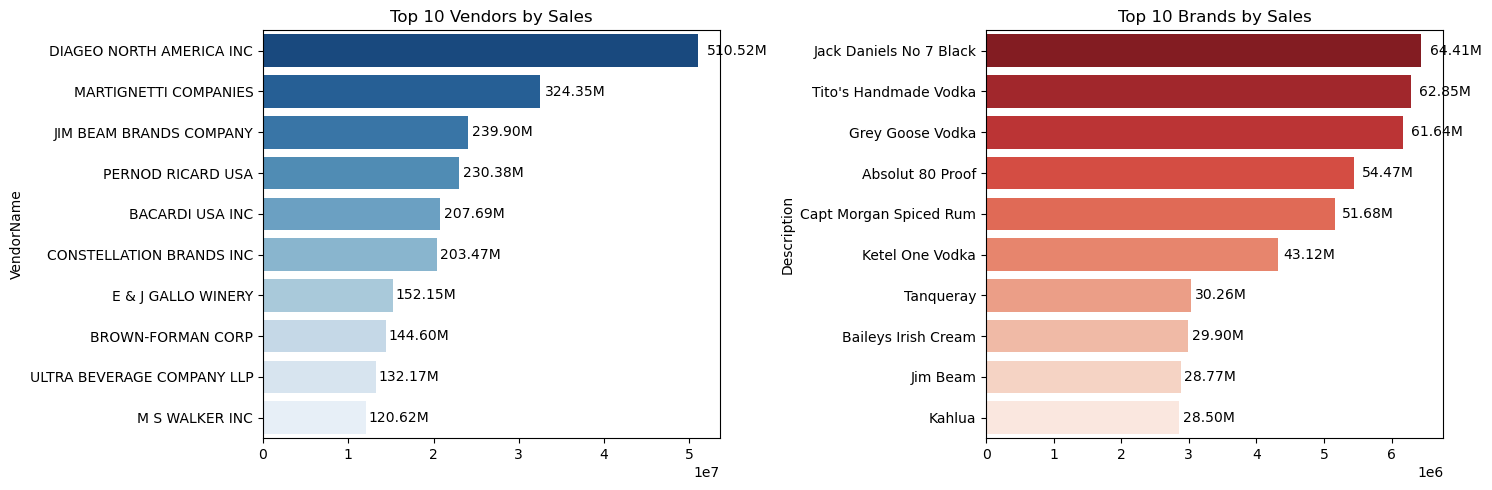

In [48]:
plt.figure(figsize=(15,5))

#plot for top vendors
plt.subplot(1,2,1)
ax1= sns.barplot(y=top_vendors.index , x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

#plot for To Brands
plt.subplot(1,2,2)
ax2= sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

 3. which vendors contribute the most to total purchase dollars

In [58]:
vendor_performance = df.groupby('VendorName').agg({
   'TotalPurchaseDollars':'sum',
   'GrossProfit': 'sum',
   'TotalSalesDollars':'sum'
}).reset_index()
vendor_performance.shape

(114, 4)

In [60]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum()*100

In [62]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)

In [56]:
#Display top 10 vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,ADAMBA IMPORTS INTL INC,446.16,3.5399999999999636,449.7,0.000162
1,ALISA CARR BEVERAGES,25.70k,66.85k,92.54k,0.009307
2,ALTAMAR BRANDS LLC,11.43k,1.72k,13.15k,0.004139
3,AMERICAN SPIRITS EXCHANGE,934.08,379.18999999999994,1.31k,0.000338
4,AMERICAN VINTAGE BEVERAGE,1.04M,14.98k,1.19M,0.037824
5,ATLANTIC IMPORTING COMPANY,3.23k,9.29k,12.52k,0.001170
6,BACARDI USA INC,168.53M,39.15M,207.69M,6.103678
7,BANFI PRODUCTS CORP,15.86M,6.56M,22.42M,0.574439
8,BLACK PRINCE DISTILLERY INC,5.85k,5.60k,11.45k,0.002120
9,BLACK ROCK SPIRITS LLC,1.15k,597.2,1.75k,0.000417


In [150]:
top_vendors['PurchaseContribution%'].sum()

0.6500000000000001

In [208]:
top_vendors['CumulativeContribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,CumulativeContribution%
25,DIAGEO NORTH AMERICA INC,438.58M,71.94M,510.52M,15.88,15.88
56,MARTIGNETTI COMPANIES,246.31M,78.05M,324.35M,8.92,24.80
45,JIM BEAM BRANDS COMPANY,203.48M,36.43M,239.90M,7.37,32.17
67,PERNOD RICARD USA,199.52M,30.86M,230.38M,7.23,39.40
6,BACARDI USA INC,168.53M,39.15M,207.69M,6.10,45.50
20,CONSTELLATION BRANDS INC,147.64M,55.83M,203.47M,5.35,50.85
11,BROWN-FORMAN CORP,122.02M,22.57M,144.60M,4.42,55.27
30,E & J GALLO WINERY,116.41M,35.74M,152.15M,4.22,59.49
103,ULTRA BEVERAGE COMPANY LLP,101.11M,31.06M,132.17M,3.66,63.15
52,M S WALKER INC,91.97M,28.65M,120.62M,3.33,66.48


In [4]:
fig, ax1 = plt.subplots(figsize=(10,6))

#Bar plot for purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value-1, str(value)+'%', ha='center', fontsize=10, color='white')

#Line plot for Cumulative contribution%
ax2= ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['CumulativeContribution%'], color='red', marker='o', linestyle='dashed', label='CumulativeContribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')

ax1.set_title('Pareto Chart: Vendor Contribution to total purchase')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()
              

NameError: name 'plt' is not defined

3. How much of total procurement is dependent on the top vendors ?


In [213]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 66.48 %


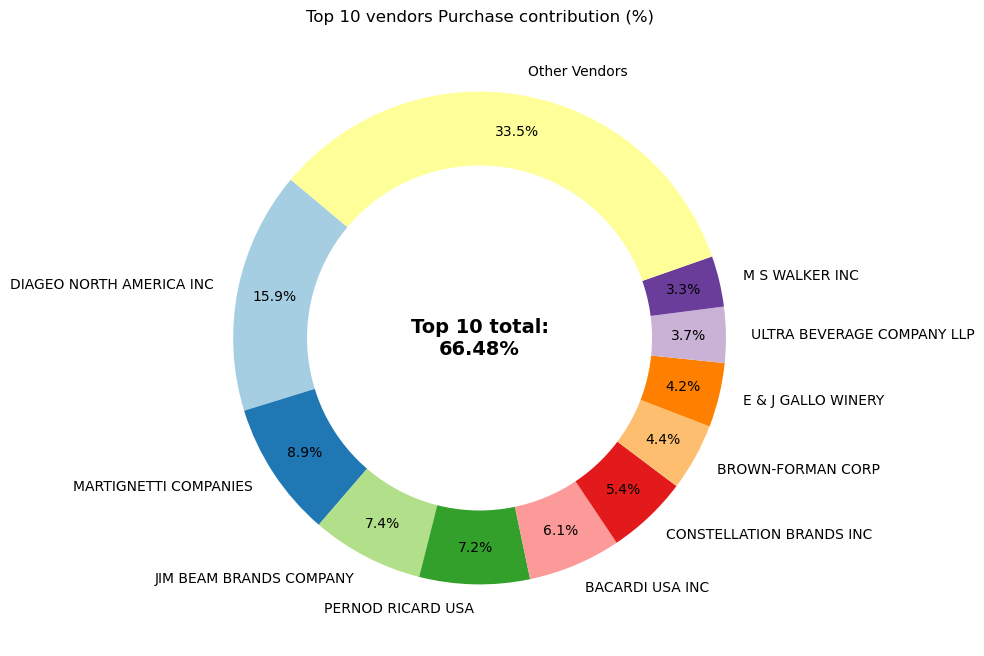

In [227]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions =list(top_vendors['PurchaseContribution%'].values)
total_contributions = sum(purchase_contributions)
remaining_contributions= 100- total_contributions

#Apped "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contributions)

#Donut Chart
fig, ax= plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

#Draw a white circle in the center to create a "Donut" effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

#Add Total Contribution annotation in the center 
plt.text(0,0, f"Top 10 total:\n{total_contributions:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 vendors Purchase contribution (%)")
plt.show()
                              

4. Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost saving ?

In [230]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [234]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [242]:
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
7489,Small,2
7490,Small,2
7491,Small,6
7492,Small,1


In [244]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,40.581136
Medium,13.937597
Large,10.232522


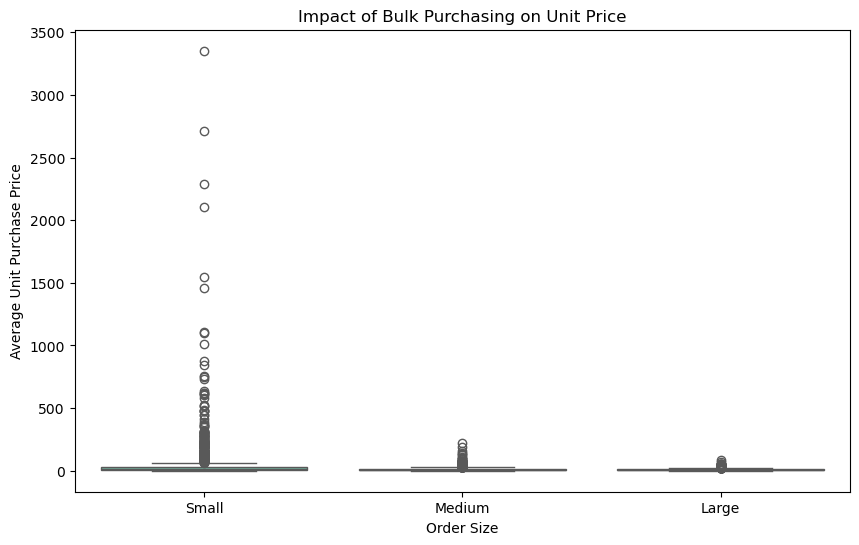

In [252]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

* Vendors buying in bulk(LargeOrder Size) get the lowest unit price ($10.78 per unit), meaning much higher margins if they can manage inventory efficiently.
* the price difference between small and large orders is substancial(-72% reduction in unit cost)
* this suggests that bulk pricing strategies successfully encourage vendors o purchase in larger volumns , leading to higher overall sales despite lower per-unit revenue

5. Which vendors have low inventory turnover, indicating excess stock and slow - moving products ?

In [264]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.500000
HAUNTING WHISPER VYDS,0.659701
THE PIERPONT GROUP LLC,0.690840
Dunn Wine Brokers,0.696364
DJINN SPIRITS LLC,0.697912
KLIN SPIRITS LLC,0.704008
HIGHLAND WINE MERCHANTS LLC,0.708333
INCREDIBREW INC,0.726763
LABELLE VYDS AND WINERY,0.728949


6. How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it ?

In [269]:
df['UnsoldInventoryValue'] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 403.45M


In [273]:
#Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

#Sort Vendors with the highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending =False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,70.30M
56,MARTIGNETTI COMPANIES,35.67M
67,PERNOD RICARD USA,32.33M
45,JIM BEAM BRANDS COMPANY,29.97M
20,CONSTELLATION BRANDS INC,21.32M
6,BACARDI USA INC,21.14M
30,E & J GALLO WINERY,19.32M
11,BROWN-FORMAN CORP,19.15M
78,SAZERAC CO INC,13.49M
52,M S WALKER INC,11.50M


6. What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors

In [66]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [68]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [284]:
top_vendors

0       12.896172
1        7.954717
2       14.539646
3       10.459418
4       16.042464
          ...    
3125    79.052848
3265    85.507362
4195    92.905390
4344    94.980614
4452    93.961465
Name: ProfitMargin, Length: 1874, dtype: float64

In [286]:
low_vendors

4907     1.903080
4936     6.037611
4951     5.545844
4960     7.656571
4983     7.502969
          ...    
7489    89.806174
7490    83.448276
7491    96.436186
7492    98.808559
7493    99.166079
Name: ProfitMargin, Length: 1874, dtype: float64

In [90]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  #standardError
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data)-1)
    margin_of_error = t_critical + std_err
    return mean_val, mean_val -  margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (18.87, 23.36), Mean: 21.11
Low Vendors 95% CI: (39.92, 45.08), Mean: 42.50


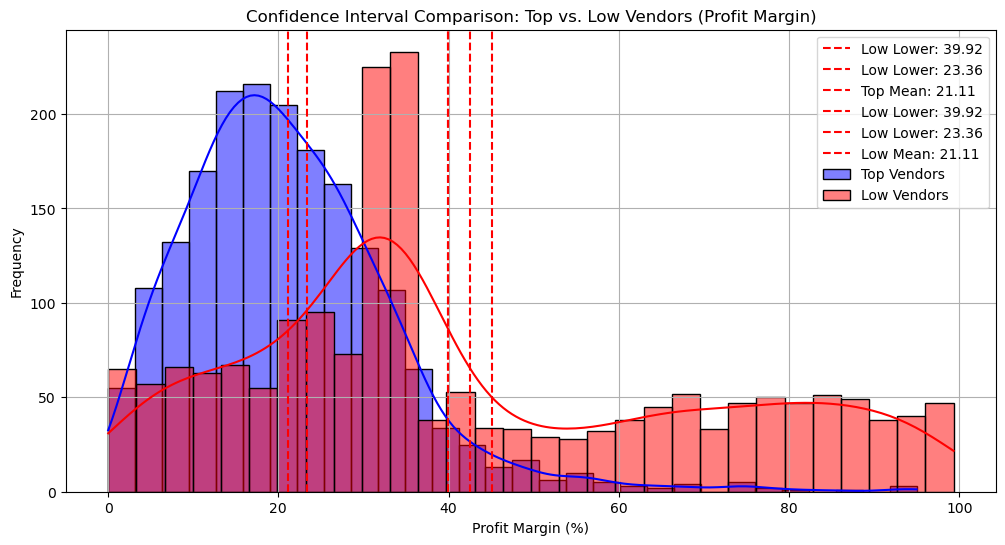

In [96]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12,6))

#TOP Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(top_upper, color="red", linestyle="--", label=f"Low Lower: {top_upper:.2f}")
plt.axvline(top_mean, color="red", linestyle="--", label=f"Top Mean: {top_mean:.2f}")

#Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Lower: {top_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="--", label=f"Low Mean: {top_mean:.2f}")

#Finalize plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


* The confidence interval for low performing vendors(39.92%to 45.08%) insignificantly higher than the high performing Vendors(18.87% to 23.36%)
* This suggests that the vendors with lower sales tend to maintain higher profit margins , potentially due to premium pricing or lower operational costs.
* For High-Performing Vendors: if they aim to improve profitability , they could explore selective price adjustments , cost optimization , or bundeling starategies.
* For Low-Performing Vendors: Despite higher margin, their low sales volume might indicate a need for better marketing , competetive pricing , or improved distribution strategies.

# Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

H1 (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors

H2 (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [119]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold] ["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold] ["ProfitMargin"].dropna()

#Perform Two-Sample T-test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

#Perform results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value <0.05:
    print("Reject H1: There is significant difference in profit margins between top and low performing vendors.")
else:
    print("Fall to Reject H1: No Significant difference in profit margin.")

T-Statistic: -31.3156, P-Value: 0.0000
Reject H1: There is significant difference in profit margins between top and low performing vendors.
